# Praktikum AI Modul 4
#### Praktikan :
1. Fathika Afrine Azaruddin - 5027211016

#### Import Library and Load Data

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

company_data = pd.read_csv('company_data.csv')

In [34]:
company_data

,Unnamed: 0,company,employee_turnover,revenue_growth,rd_investment,operational_cost,average_salary,market_volatility,average_tenure,growth_potential,net_profit
0,0,Company_1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Company_2,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,Company_3,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,Company_4,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,Company_5,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,162,Company_163,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,163,Company_164,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,164,Company_165,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,165,Company_166,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [35]:
company_data.describe()

,Unnamed: 0,employee_turnover,revenue_growth,rd_investment,operational_cost,average_salary,market_volatility,average_tenure,growth_potential,net_profit
count,167.00000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,83.00000,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,48.35287,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,0.00000,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,41.50000,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,83.00000,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,124.50000,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,166.00000,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [36]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         167 non-null    int64  
 1   company            167 non-null    object 
 2   employee_turnover  167 non-null    float64
 3   revenue_growth     167 non-null    float64
 4   rd_investment      167 non-null    float64
 5   operational_cost   167 non-null    float64
 6   average_salary     167 non-null    int64  
 7   market_volatility  167 non-null    float64
 8   average_tenure     167 non-null    float64
 9   growth_potential   167 non-null    float64
 10  net_profit         167 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 14.5+ KB


In [37]:
# Drop the unnecessary index column
company_data.drop(columns=['Unnamed: 0'], inplace=True)

In [38]:
company_data

,company,employee_turnover,revenue_growth,rd_investment,operational_cost,average_salary,market_volatility,average_tenure,growth_potential,net_profit
0,Company_1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Company_2,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Company_3,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Company_4,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Company_5,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Company_163,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Company_164,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Company_165,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Company_166,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#### Exploratory Data Analysis (EDA)

C:\Users\62888\AppData\Local\Temp\ipykernel_115976\2926886837.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\62888\AppData\Local\Temp\ipykernel_115976\2926886837.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\62888\AppData\Local\Temp\ipykernel_115976\2926886837.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\62888\AppData\Local\Temp\ipykernel_115976\2926886837.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\62888\AppData\Local\Temp\ipykernel_115976\2926886837.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\62888\AppData\Local\Temp\ipykernel_115976\2926886837.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\62888\AppData\Local\Temp\ipykernel_115976\2926886837.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\6288

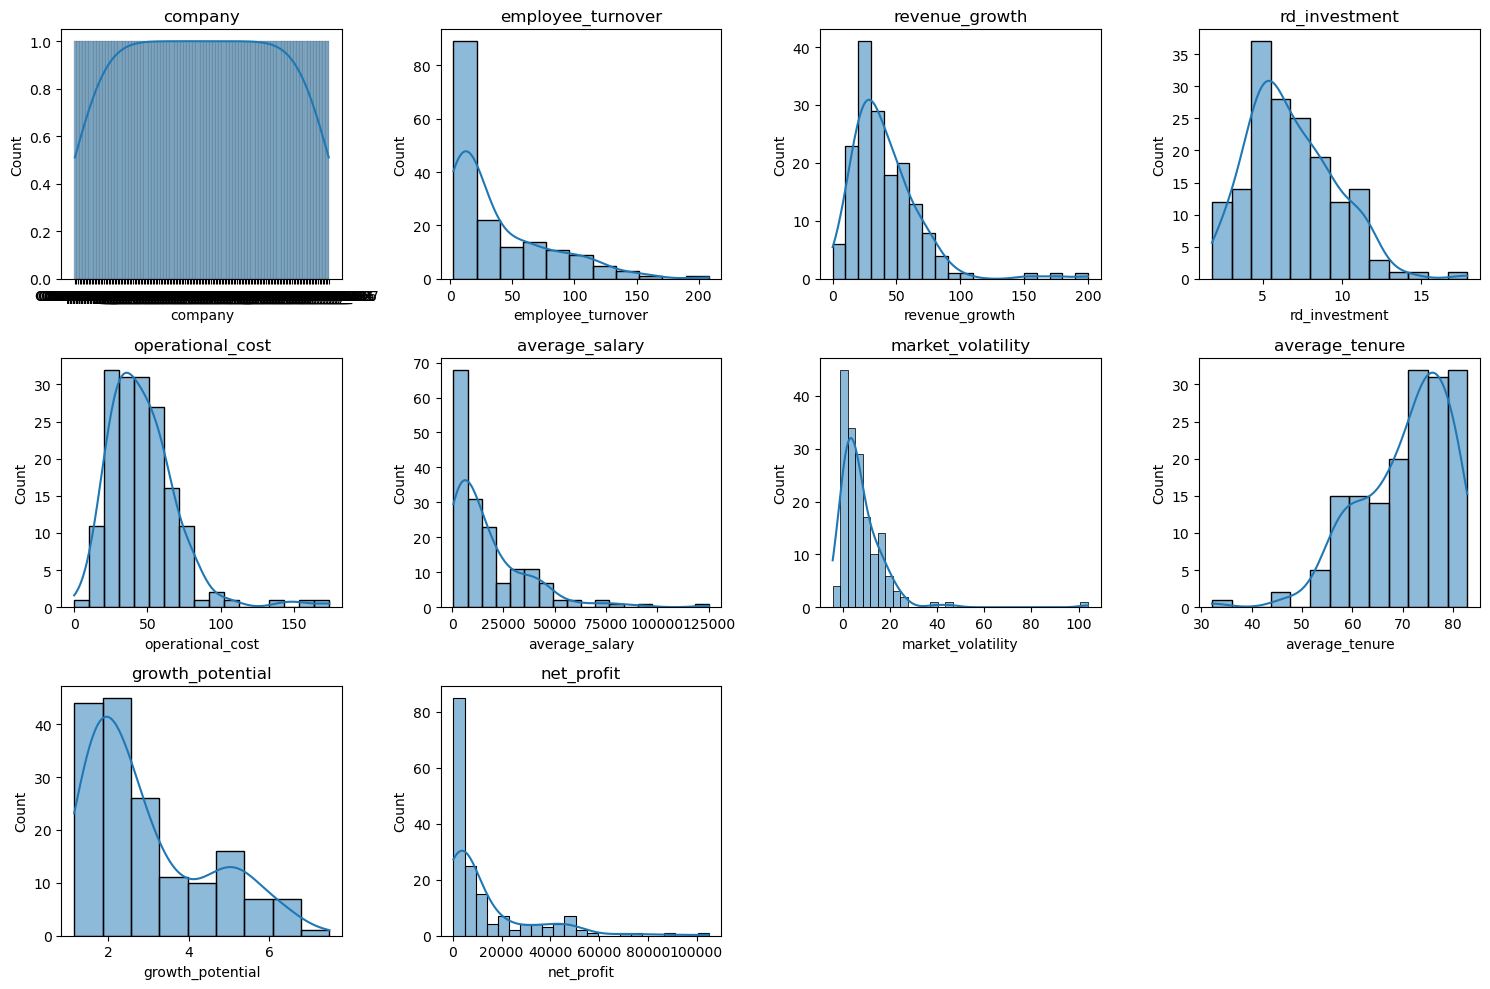

In [39]:
# 1. Pemeriksaan Distribusi Data
# Menggunakan histogram untuk memahami distribusi setiap variabel
plt.figure(figsize=(15, 10))
for i, col in enumerate(company_data.columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(company_data[col], kde=True)
    plt.title(col)
    plt.tight_layout()
plt.show()

<Axes: >

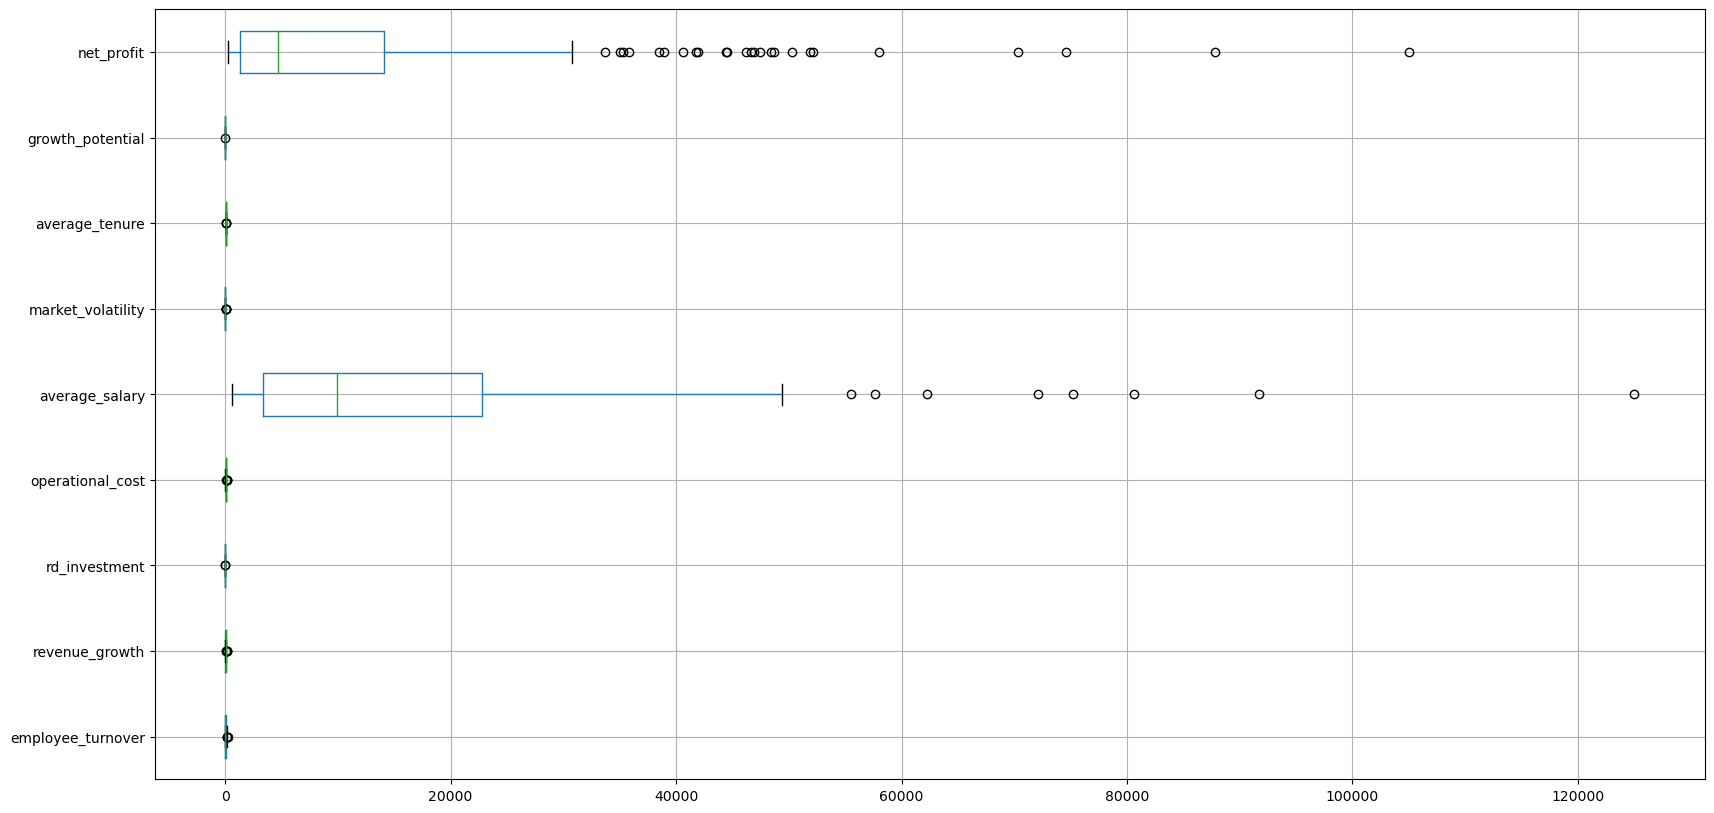

In [40]:
# 2. Analisis Outlier
plt.figure(figsize=(20,10))
company_data.boxplot(vert=False)

C:\Users\62888\AppData\Local\Temp\ipykernel_115976\298154960.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\62888\AppData\Local\Temp\ipykernel_115976\298154960.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\62888\AppData\Local\Temp\ipykernel_115976\298154960.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\62888\AppData\Local\Temp\ipykernel_115976\298154960.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\62888\AppData\Local\Temp\ipykernel_115976\298154960.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\62888\AppData\Local\Temp\ipykernel_115976\298154960.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\62888\AppData\Local\Temp\ipykernel_115976\298154960.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\6288

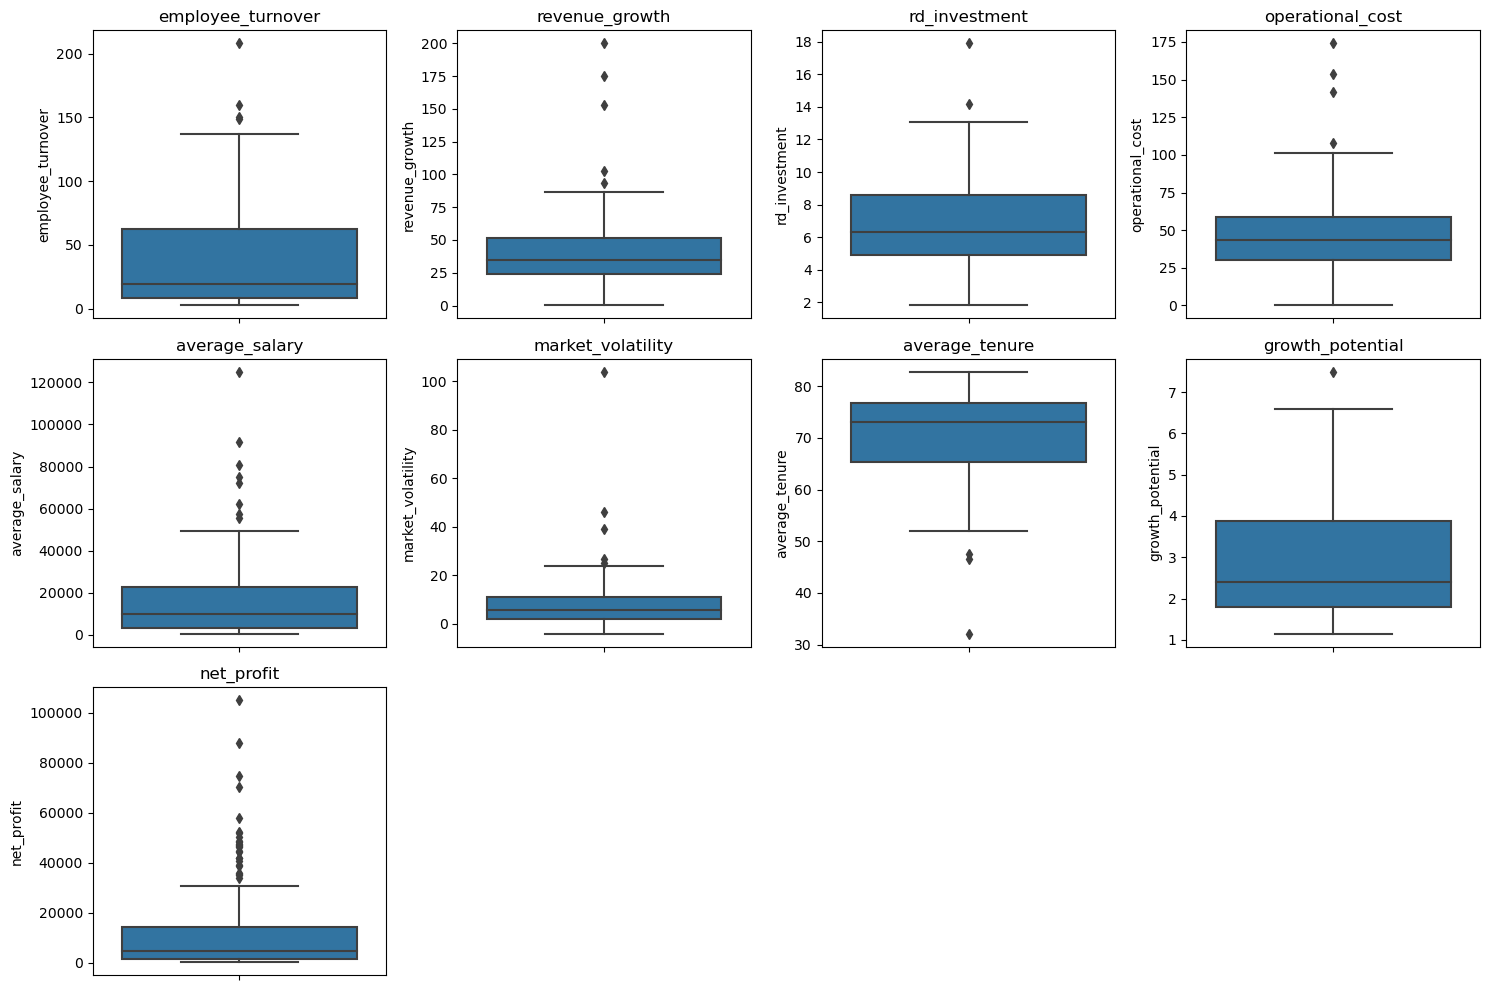

In [41]:
# 3. Analisis Outlier
# Menggunakan boxplot untuk mengidentifikasi outlier pada setiap variabel
plt.figure(figsize=(15, 10))
numeric_cols = company_data.select_dtypes(include=['float64', 'int64']).columns  # Select only numeric columns

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=company_data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

C:\Users\62888\AppData\Local\Temp\ipykernel_115976\2210337142.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = company_data.corr()


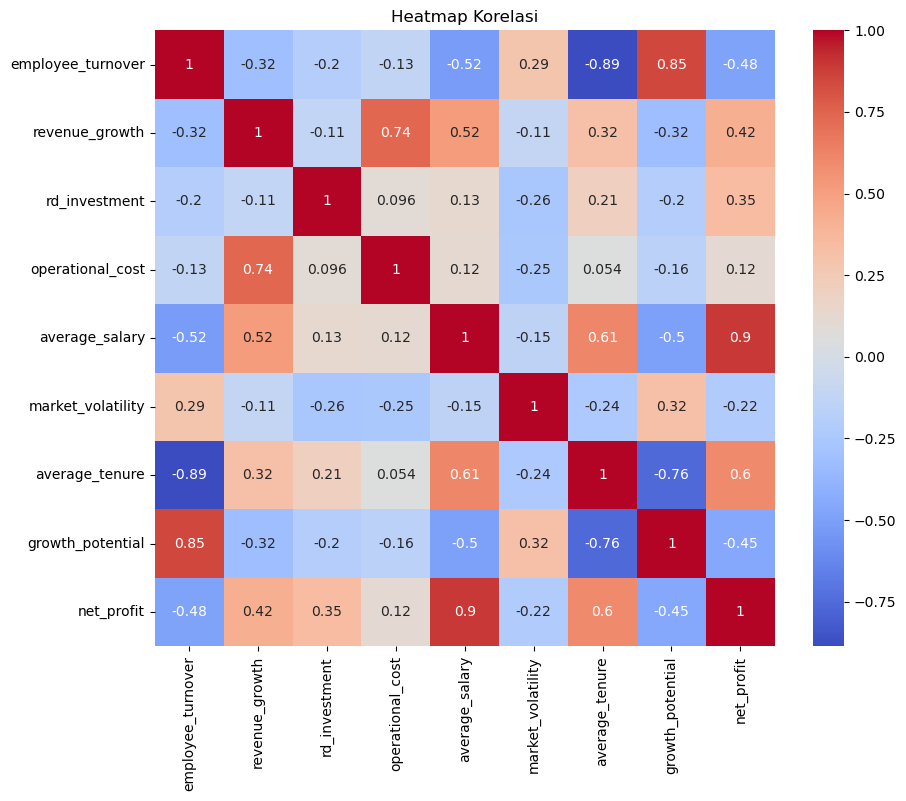

In [42]:
# 4. Analisis Korelasi
# Menggunakan heatmap untuk memahami korelasi antar variabel
correlation_matrix = company_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

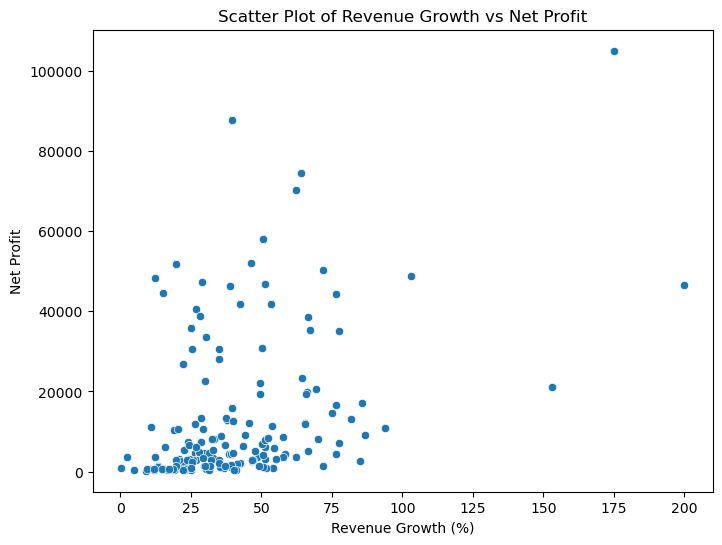

In [43]:
# 5. Visualisasi Data Lanjutan
# Contoh: Scatter plot antara revenue_growth dan net_profit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=company_data, x='revenue_growth', y='net_profit')
plt.title('Scatter Plot of Revenue Growth vs Net Profit')
plt.xlabel('Revenue Growth (%)')
plt.ylabel('Net Profit')
plt.show()

### Clustering

In [44]:
# Preparing data for clustering (excluding the 'company' column)
clustering_data = company_data.drop(columns=['company'])

In [45]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

In [46]:
# Determining the optimal number of clusters using silhouette score
silhouette_scores = []
range_n_clusters = list(range(2, 11))  # Considering 2 to 10 clusters

In [47]:
for n_clusters in range_n_clusters:
    # Initialize the clusterer
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_data)
    
    # Silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

c:\Users\62888\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\62888\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\62888\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\62888\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\62888\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\62888\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

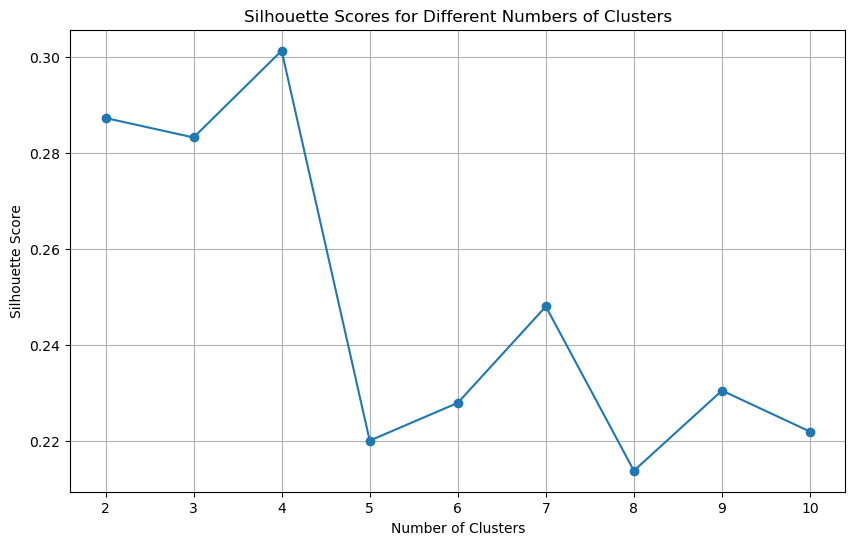

In [48]:
# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

#### K Means Clustering

In [49]:
# Performing clustering with the optimal number of clusters (e.g., 4)
optimal_cluster_number = 4  # Replace this with the determined optimal number
kmeans = KMeans(n_clusters=optimal_cluster_number, random_state=10)
cluster_labels = kmeans.fit_predict(scaled_data)

c:\Users\62888\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\62888\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [50]:
# Adding the cluster labels to the original dataframe
company_data['Cluster'] = cluster_labels

In [51]:
# Grouping the data by cluster to analyze the characteristics of each cluster
cluster_analysis = company_data.groupby('Cluster').mean()
print(cluster_analysis)

         employee_turnover  revenue_growth  rd_investment  operational_cost  \
Cluster                                                                       
0                 4.953333       45.826667       9.168667         39.736667   
1                21.389655       41.290678       6.235862         48.038689   
2                92.961702       29.151277       6.388511         42.323404   
3                 4.133333      176.000000       6.793333        156.666667   

         average_salary  market_volatility  average_tenure  growth_potential  \
Cluster                                                                        
0          45250.000000           2.742200       80.376667          1.795333   
1          12968.620690           7.413460       72.935632          2.286552   
2           3942.404255          12.019681       59.187234          5.008085   
3          64033.333333           2.468000       81.433333          1.380000   

           net_profit  
Cluster             

C:\Users\62888\AppData\Local\Temp\ipykernel_115976\1996741472.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = company_data.groupby('Cluster').mean()


<function matplotlib.pyplot.show(close=None, block=None)>

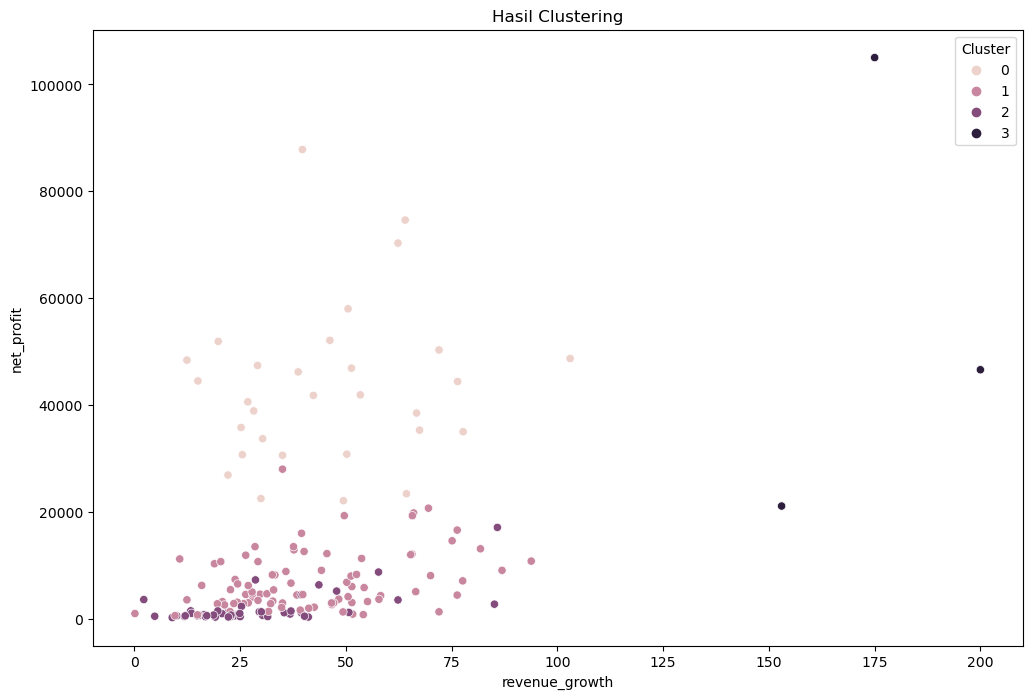

In [52]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=company_data['revenue_growth'], y=company_data['net_profit'], hue=company_data['Cluster'])
sns.color_palette("viridis")
plt.title('Hasil Clustering')
plt.xlabel('revenue_growth')
plt.ylabel('net_profit')
plt.show

In [53]:
for i in range(n_clusters):
    print(f"\nRekomendasi Strategis untuk Cluster {i}:")

    # Rekomendasi berdasarkan karakteristik cluster
    if cluster_analysis['employee_turnover'][i] > 50:
        print("Prioritaskan upaya untuk meningkatkan retensi karyawan.")
    else:
        print("Konsolidasikan program retensi karyawan yang telah terbukti efektif.")

    if cluster_analysis['revenue_growth'][i] > 50:
        print("Fokuskan pada strategi pertumbuhan untuk memanfaatkan momentum positif.")
    else:
        print("Lakukan evaluasi mendalam terhadap strategi pertumbuhan untuk meningkatkan performa.")

    if cluster_analysis['rd_investment'][i] > 8:
        print("Pertahankan atau tingkatkan investasi dalam penelitian dan pengembangan untuk mendorong inovasi.")
    else:
        print("Lakukan evaluasi menyeluruh terhadap efektivitas investasi R&D dan sesuaikan sesuai kebutuhan bisnis.")

    if cluster_analysis['operational_cost'][i] > 100:
        print("Optimalkan biaya operasional untuk meningkatkan efisiensi bisnis.")
    else:
        print("Pertimbangkan bahwa biaya operasional sudah berada dalam kisaran yang sehat.")

    if cluster_analysis['average_salary'][i] > 50000:
        print("Evaluasi kebijakan gaji untuk menjaga keseimbangan antara kesejahteraan karyawan dan keberlanjutan finansial.")
    else:
        print("Pastikan kebijakan gaji mendukung daya saing dan mempromosikan retensi karyawan.")

    if cluster_analysis['market_volatility'][i] > 50:
        print("Sesuaikan strategi bisnis dengan lebih baik untuk menghadapi volatilitas pasar yang tinggi.")
    else:
        print("Lakukan evaluasi kebijakan dan strategi yang mungkin diperlukan untuk menghadapi perubahan pasar.")

    if cluster_analysis['average_tenure'][i] < 65:
        print("Pertimbangkan upaya untuk meningkatkan retensi karyawan dan membangun loyalitas.")
    else:
        print("Apresiasi dan pertahankan budaya perusahaan yang mendukung kestabilan dan loyalitas karyawan.")

    if cluster_analysis['growth_potential'][i] > 4:
        print("Fokuskan upaya pada eksplorasi potensi pertumbuhan yang lebih tinggi.")
    else:
        print("Lakukan evaluasi dan perbaiki strategi pertumbuhan untuk mencapai potensi yang lebih tinggi.")

    if cluster_analysis['net_profit'][i] > 30000:
        print("Prioritaskan strategi untuk mempertahankan dan meningkatkan laba bersih.")
    else:
        print("Lakukan evaluasi terhadap komponen biaya dan strategi bisnis untuk meningkatkan profitabilitas.")


Rekomendasi Strategis untuk Cluster 0:
Konsolidasikan program retensi karyawan yang telah terbukti efektif.
Lakukan evaluasi mendalam terhadap strategi pertumbuhan untuk meningkatkan performa.
Pertahankan atau tingkatkan investasi dalam penelitian dan pengembangan untuk mendorong inovasi.
Pertimbangkan bahwa biaya operasional sudah berada dalam kisaran yang sehat.
Pastikan kebijakan gaji mendukung daya saing dan mempromosikan retensi karyawan.
Lakukan evaluasi kebijakan dan strategi yang mungkin diperlukan untuk menghadapi perubahan pasar.
Apresiasi dan pertahankan budaya perusahaan yang mendukung kestabilan dan loyalitas karyawan.
Lakukan evaluasi dan perbaiki strategi pertumbuhan untuk mencapai potensi yang lebih tinggi.
Prioritaskan strategi untuk mempertahankan dan meningkatkan laba bersih.

Rekomendasi Strategis untuk Cluster 1:
Konsolidasikan program retensi karyawan yang telah terbukti efektif.
Lakukan evaluasi mendalam terhadap strategi pertumbuhan untuk meningkatkan performa.

KeyError: 4